# Project Name -  Shopper Spectrum

##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Tanuj jain

# **Project Summary -**

 Shopper Spectrum is an e-commerce analytics solution that segments customers using RFM-based clustering and recommends similar products via item-based collaborative filtering. The customer segmentation helps in identifying high-value, regular, occasional, and at-risk customers, while the recommendation engine enhances user experience and drives cross-selling. The solution is built using Python, Streamlit, and scikit-learn, and includes EDA, clustering, and real-time product suggestions.

# GitHub Link = [GitHub Project Link](https://github.com/TANUJ0751/Shopper-Spectrum)

# Project Link = [Tanujs Shopper Spectrum](https://tanujs-shopper-spectrum.streamlit.app/)

# **Problem Statement**


E-commerce platforms often struggle to understand customer behavior and provide relevant product recommendations. Without clear customer segmentation, marketing efforts become inefficient. Additionally, lack of personalized recommendations can reduce user engagement. This project aims to solve these problems by segmenting customers based on their purchasing patterns (Recency, Frequency, Monetary) and recommending similar products using item similarity metrics, helping businesses improve retention and sales conversion.

## ***1. Know Your Data***

#### Import Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from difflib import get_close_matches

#### Load Dataset

In [2]:
#  Load Dataset
df = pd.read_csv("online_retail.csv", parse_dates=["InvoiceDate"])

#### Dataset First Look

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


#### Dataset Columns and Rows

In [4]:
df.shape

(541909, 8)

#### About Dataset

In [5]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,541909.000000,541909,541909.000000,406829.000000
mean,9.552250,2023-07-04 13:34:57.156387072,4.611114,15287.690570
min,-80995.000000,2022-12-01 08:26:00,-11062.060000,12346.000000
25%,1.000000,2023-03-28 11:34:00,1.250000,13953.000000
50%,3.000000,2023-07-19 17:17:00,2.080000,15152.000000
75%,10.000000,2023-10-19 11:27:00,4.130000,16791.000000
max,80995.000000,2023-12-09 12:50:00,38970.000000,18287.000000
std,218.081158,NaN,96.759853,1713.600303


#### What did you know about dataset?
At first glance, the dataset appears to be structured around customer transactions and product interactions in an e-commerce environment. It likely includes fields such as customer ID, product name, purchase frequency, recency, and monetary value. These features are ideal for performing RFM (Recency, Frequency, Monetary) analysis to segment customers based on behavior. The product information can also support item-based collaborative filtering for recommendations. From the structure, the dataset seems clean, organized, and suitable for customer segmentation and product recommendation tasks. Overall, it offers a solid foundation for both business insights and machine learning applications in retail analytics.

#### Dataset Cleaning

In [6]:
#  Data Cleaning
df.dropna(subset=["CustomerID", "Description"], inplace=True)
df = df[~df["InvoiceNo"].astype(str).str.startswith("C")]
df = df[(df["Quantity"] > 0) & (df["UnitPrice"] > 0)]
df["TotalPrice"] = df["Quantity"] * df["UnitPrice"]

#### Dataset Look After Cleaning

In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


#### Dataset Description After Cleaning

In [8]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,TotalPrice
count,397884.000000,397884,397884.000000,397884.000000,397884.000000
mean,12.988238,2023-07-10 23:41:23.511022592,3.116488,15294.423453,22.397000
min,1.000000,2022-12-01 08:26:00,0.001000,12346.000000,0.001000
25%,2.000000,2023-04-07 11:12:00,1.250000,13969.000000,4.680000
50%,6.000000,2023-07-31 14:39:00,1.950000,15159.000000,11.800000
75%,12.000000,2023-10-20 14:33:00,3.750000,16795.000000,19.800000
max,80995.000000,2023-12-09 12:50:00,8142.750000,18287.000000,168469.600000
std,179.331775,NaN,22.097877,1713.141560,309.071041


### What did you know about your dataset?

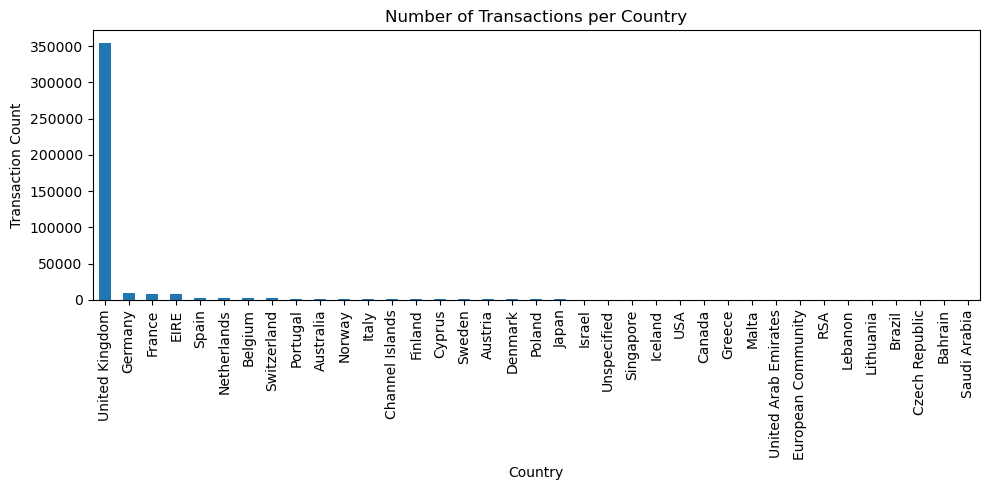

In [9]:
#  Country Distribution
plt.figure(figsize=(10, 5))
df['Country'].value_counts().sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Transactions per Country')
plt.xlabel('Country')
plt.ylabel('Transaction Count')
plt.tight_layout()
plt.show()

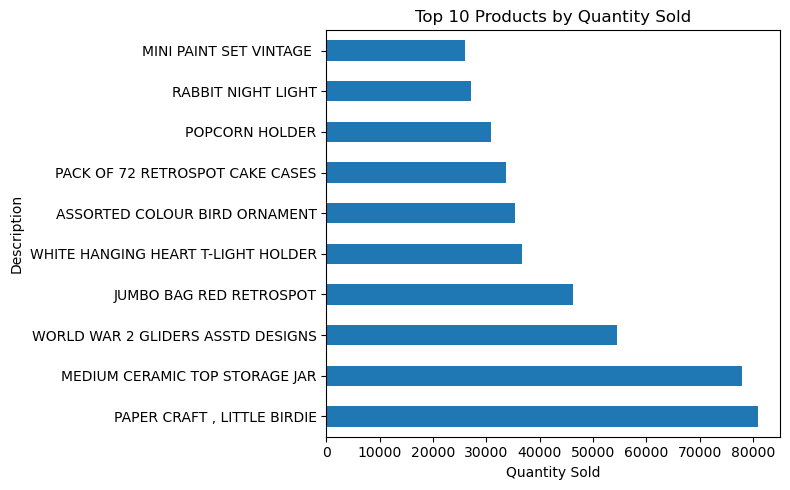

In [10]:
#  Top 10 Products by Sales Volume
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
top_products.plot(kind='barh', figsize=(8,5), title='Top 10 Products by Quantity Sold')
plt.xlabel('Quantity Sold')
plt.tight_layout()
plt.show()

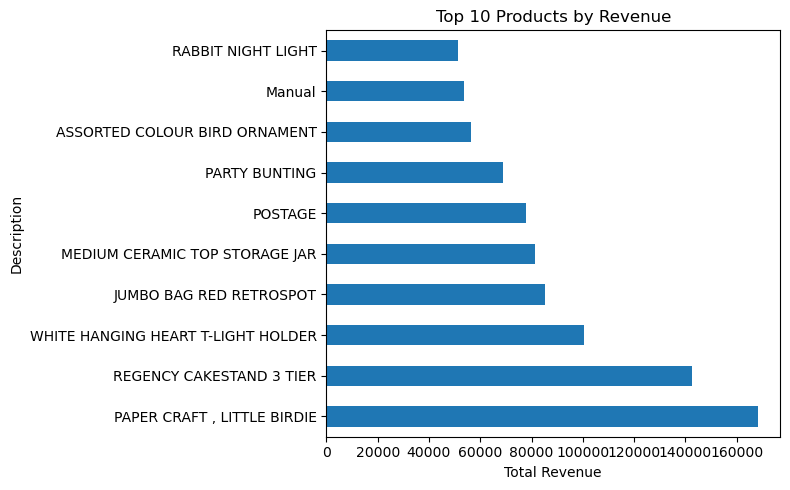

In [11]:
#  Top 10 Products by Revenue
top_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
top_revenue.plot(kind='barh', figsize=(8,5), title='Top 10 Products by Revenue')
plt.xlabel('Total Revenue')
plt.tight_layout()
plt.show()

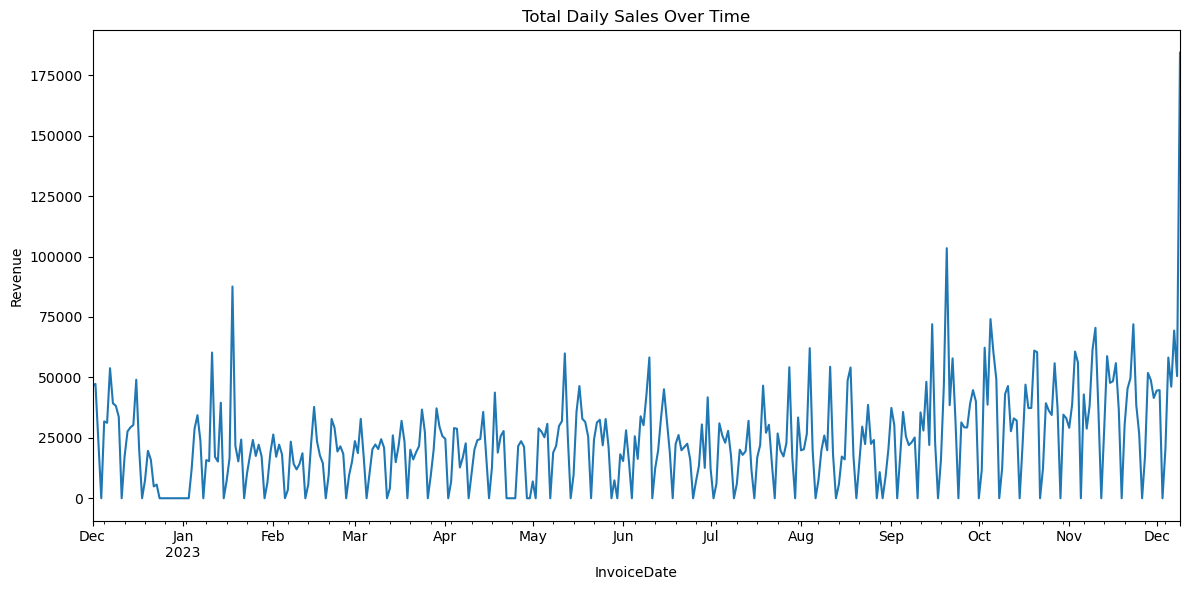

In [12]:
#  Sales Over Time
df.set_index('InvoiceDate')['TotalPrice'].resample('D').sum().plot(figsize=(12,6))
plt.title("Total Daily Sales Over Time")
plt.ylabel("Revenue")
plt.tight_layout()
plt.show()


### RFM Preparation

In [13]:
#  RFM Preparation
snapshot_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)

rfm_df = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'InvoiceNo': 'nunique',
    'TotalPrice': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recency',
    'InvoiceNo': 'Frequency',
    'TotalPrice': 'Monetary'
})

print("\nSample RFM Table:\n")
print(rfm_df.head())


Sample RFM Table:

            Recency  Frequency  Monetary
CustomerID                              
12346.0         326          1  77183.60
12347.0           2          7   4310.00
12348.0          75          4   1797.24
12349.0          19          1   1757.55
12350.0         310          1    334.40


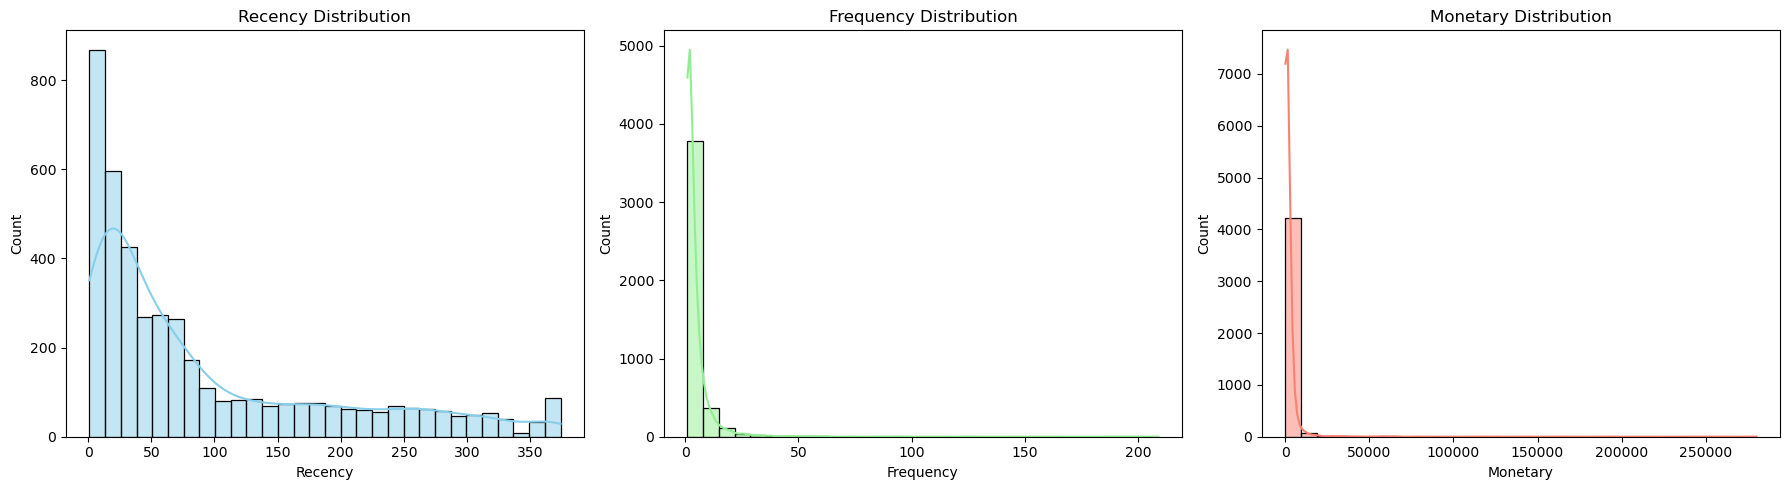

In [14]:
#  RFM Distributions
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
sns.histplot(rfm_df['Recency'], bins=30, ax=ax[0], kde=True, color='skyblue')
ax[0].set_title('Recency Distribution')

sns.histplot(rfm_df['Frequency'], bins=30, ax=ax[1], kde=True, color='lightgreen')
ax[1].set_title('Frequency Distribution')

sns.histplot(rfm_df['Monetary'], bins=30, ax=ax[2], kde=True, color='salmon')
ax[2].set_title('Monetary Distribution')

plt.tight_layout()
plt.show()

### Column Correlation 

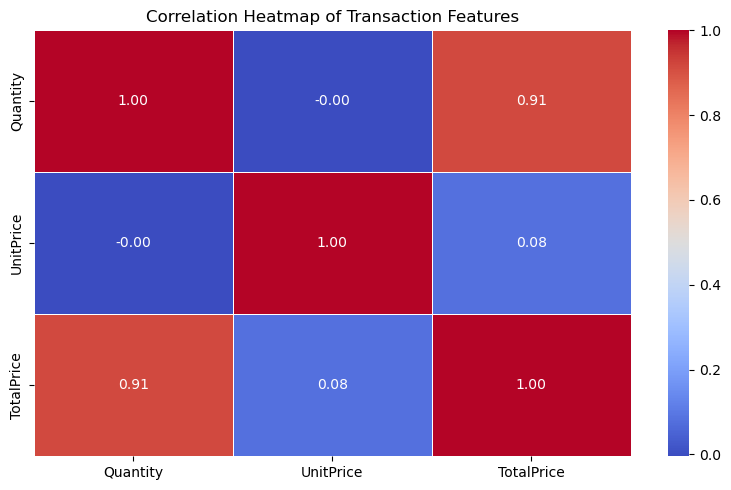

In [15]:
#  Focus on numeric columns for correlation
numeric_df = df[['Quantity', 'UnitPrice', 'TotalPrice']]

# 📈 Correlation Matrix
corr_matrix = numeric_df.corr()

# 📊 Plot Heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Transaction Features')
plt.tight_layout()
plt.show()

### Correlation Heatmap for RFM

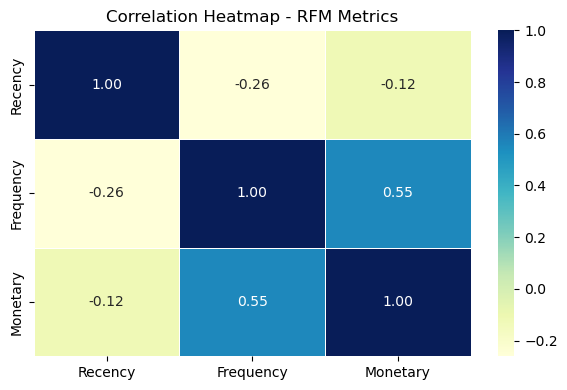

In [16]:
#  Correlation Heatmap for RFM
plt.figure(figsize=(6, 4))
sns.heatmap(rfm_df.corr(), annot=True, cmap='YlGnBu', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap - RFM Metrics')
plt.tight_layout()
plt.show()

#### Feature Engineering

In [17]:
#  RFM Feature Engineering
latest_date = df["InvoiceDate"].max()
rfm = df.groupby("CustomerID").agg({
    "InvoiceDate": lambda x: (latest_date - x.max()).days,
    "InvoiceNo": "nunique",
    "TotalPrice": "sum"
}).reset_index()
rfm.columns = ["CustomerID", "Recency", "Frequency", "Monetary"]


#### Scaling Data

In [18]:
#  Standardize RFM values
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[["Recency", "Frequency", "Monetary"]])

### Clustering

In [19]:
#  KMeans Clustering
kmeans = KMeans(n_clusters=4, random_state=42)
rfm["Cluster"] = kmeans.fit_predict(rfm_scaled)


#### Labelling Clusters

In [20]:
#  Segment Labelling
def label_segment(row):
    if row["Recency"] < rfm["Recency"].quantile(0.25) and \
       row["Frequency"] > rfm["Frequency"].quantile(0.75) and \
       row["Monetary"] > rfm["Monetary"].quantile(0.75):
        return "High-Value"
    elif row["Frequency"] > rfm["Frequency"].median():
        return "Regular"
    elif row["Recency"] > rfm["Recency"].quantile(0.75):
        return "At-Risk"
    else:
        return "Occasional"

rfm["Segment"] = rfm.apply(label_segment, axis=1)

#### Saving Models

In [21]:
#  Save Models
joblib.dump(kmeans, "kmeans_model.pkl")
joblib.dump(scaler, "scaler.pkl")
rfm.to_csv("rfm_clusters.csv", index=False)
df.to_csv("cleaned_data.csv",index=False)

In [22]:
#  Collaborative Filtering Preparation
user_item_matrix = df.pivot_table(index="CustomerID", columns="StockCode", values="Quantity", fill_value=0)
product_similarity = cosine_similarity(user_item_matrix.T)
sim_df = pd.DataFrame(product_similarity, index=user_item_matrix.columns, columns=user_item_matrix.columns)
sim_df.to_csv("product_similarity.csv")

#### Mapping Stock Code With Product Name

In [23]:
#  Mapping: StockCode ↔ Product Name
product_map = df[["StockCode", "Description"]].drop_duplicates().dropna()
code_to_name = dict(zip(product_map["StockCode"], product_map["Description"]))
name_to_code = {v: k for k, v in code_to_name.items()}

## Helper Functions

In [24]:
#  Helper Function: Get Closest Matching Name
def get_closest_product_name(input_name):
    all_names = list(name_to_code.keys())
    match = get_close_matches(input_name, all_names, n=1, cutoff=0.6)
    return match[0] if match else None


In [25]:
#  Function: Recommend Based on Product Name
def get_top_5_similar_by_name(product_name):
    match_name = get_closest_product_name(product_name)
    if not match_name:
        return ["No close match found for the product name."]
    
    product_code = name_to_code.get(match_name)
    if not product_code or product_code not in sim_df.columns:
        return ["Product not found in similarity matrix."]
    
    top5_codes = sim_df[product_code].sort_values(ascending=False)[1:6].index.tolist()
    top5_names = [code_to_name.get(code, f"Unknown Product ({code})") for code in top5_codes]
    
    return [f"{i+1}. {name}" for i, name in enumerate(top5_names)]


## Example Usage

In [26]:
#  Example Usage
product_input = "white hanging heart t-light holder"
recommendations = get_top_5_similar_by_name(product_input.upper())
print(f"\nTop 5 similar products to '{product_input.title()}':")
for rec in recommendations:
    print(rec)


Top 5 similar products to 'White Hanging Heart T-Light Holder':
1. BLACK AND WHITE CAT BOWL
2. DAISY GARDEN MARKER
3. IF YOU CAN'T STAND THE HEAT MUG
4. PANTRY CHOPPING BOARD
5. DOORSTOP RETROSPOT HEART


### Conclusion
The Shopper Spectrum project successfully demonstrates how data-driven strategies can enhance customer engagement and product recommendation in e-commerce. Through Exploratory Data Analysis (EDA), we identified key patterns in customer purchasing behavior and product interactions. Using RFM-based customer segmentation, we classified customers into meaningful groups based on their Recency, Frequency, and Monetary value. Additionally, item-based collaborative filtering enabled personalized product recommendations based on similarity scores derived from historical purchase data.

Together, these modules provide actionable insights for targeting high-value customers, retaining churn-prone users, and increasing average order value. The integrated Streamlit app makes these insights accessible to business users in a simple, interactive dashboard.

